# Decision and Regression Trees

### Decision Trees

In Python, a decision tree is a hierarchical structure that uses a sequence of rules or conditions to make decisions. It's a predictive modeling tool that can be used for classification and regression tasks. In the context of the Python programming language, libraries like scikit-learn offer implementations of decision tree algorithms.

A decision tree consists of nodes that represent a test on a particular attribute, branches that represent the outcome of the test, and leaf nodes that provide the final decision or prediction. These trees are constructed by recursively partitioning the data into subsets based on the values of the features, aiming to create branches that result in homogeneous subsets with respect to the target variable.

In Python, the DecisionTreeClassifier and DecisionTreeRegressor classes from the sklearn.tree module in scikit-learn allow you to create decision tree models for classification and regression tasks respectively. These classes enable you to train decision tree models using labeled datasets and make predictions based on the learned tree structure.

### Regression Trees

In Python, a regression tree is a decision tree used for predictive modeling in regression tasks. It's a hierarchical structure where each internal node represents a test on a specific feature, each branch denotes the outcome of the test, and each leaf node holds a numerical value representing the predicted output.

The aim of a regression tree is to predict continuous numerical values instead of discrete classes as in classification trees. When building a regression tree, the algorithm recursively splits the dataset based on features and their values to minimize the variance of the target variable within each split.

In Python, libraries like scikit-learn (sklearn) provide implementations of regression trees through the DecisionTreeRegressor class. You can create regression tree models using this class by fitting them to labeled datasets containing numerical target variables. These models use the tree structure to predict continuous values for new data based on the learned patterns in the training set.

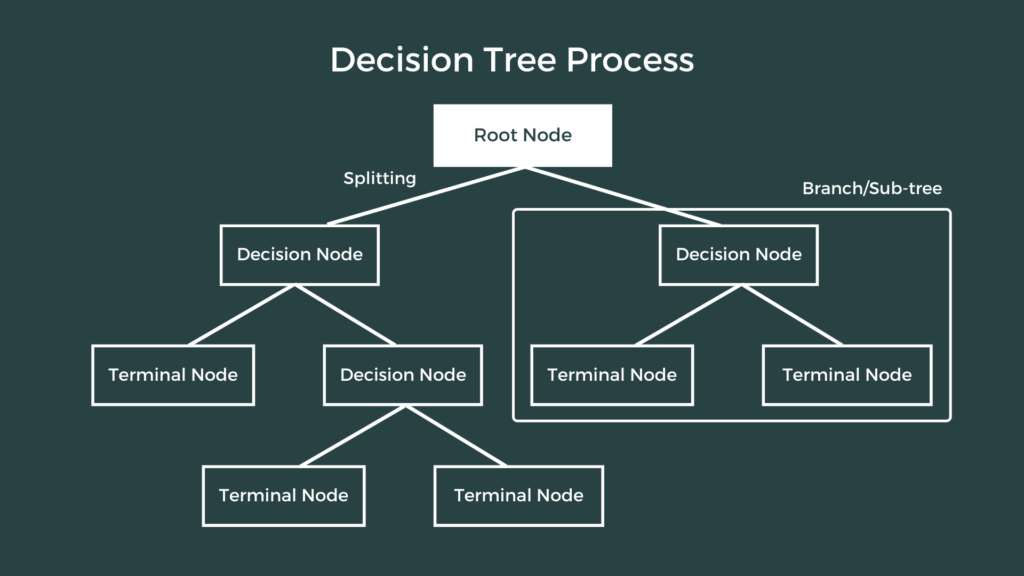

To demonstrate the functionality of decision trees, we'll explore a synthetic dataset using the make_circles() function. Run the following code cell to generate and delve into this new dataset, shedding light on decision tree behavior in an alternative scenario.

---

Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html for more information on the make_circles() parameter functions.

In [1]:
# Import all libraries used in this Notebook
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

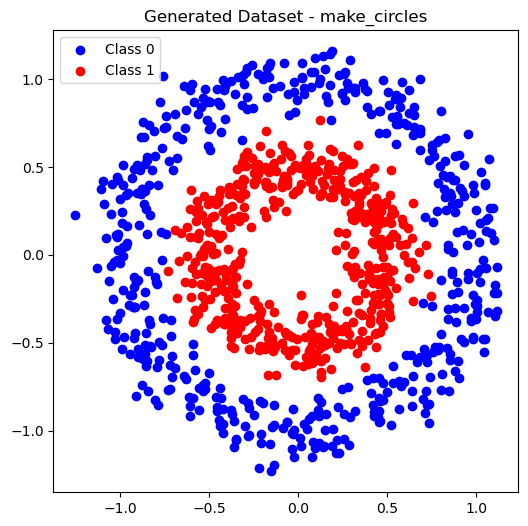

In [2]:
# Generating a synthetic dataset with circular clusters
X, y = make_circles(n_samples=1000, 
                    noise=0.1, 
                    random_state=42, 
                    factor=0.5)

# Visualizing the generated dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Generated Dataset - make_circles')
plt.legend()
plt.show()

In any machine learning workflow, it's essential to partition our dataset into separate training and testing subsets. This partitioning can be achieved by utilizing the sklearn.model_selection.train_test_split() function. Execute the code snippet below to generate this division and visualize the data specifically allocated for training purposes.

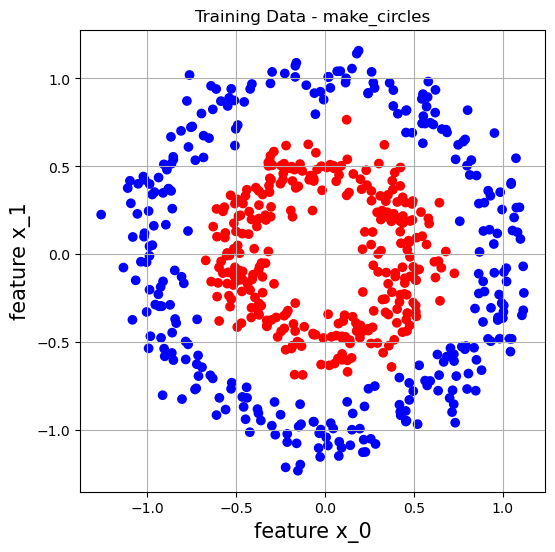

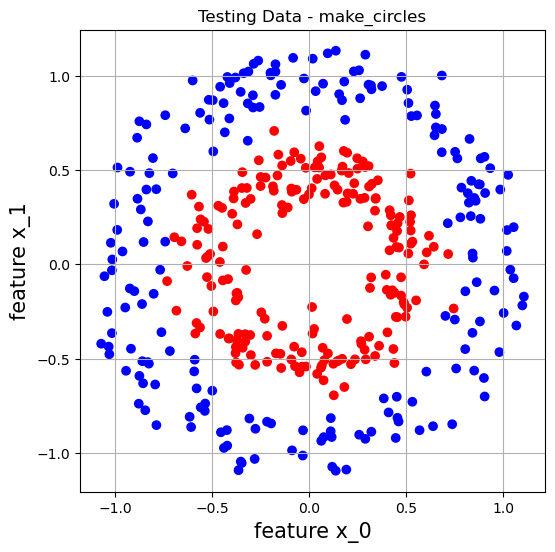

In [3]:
# Generating a synthetic dataset with circular clusters
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Assigning colors for training and testing subsets
c_train = ["red" if label == 1 else "blue" for label in y_train]
c_test = ["red" if label == 1 else "blue" for label in y_test]

# Visualizing the training data
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature x_0", fontsize=15)
plt.ylabel("feature x_1", fontsize=15)
plt.grid()
plt.title('Training Data - make_circles')
plt.show()

# Visualizing the testing data
plt.figure(figsize=(6,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
plt.xlabel("feature x_0", fontsize=15)
plt.ylabel("feature x_1", fontsize=15)
plt.grid()
plt.title('Testing Data - make_circles')
plt.show()

We proceed by creating an instance of the DecisionTreeClassifier model from sklearn.tree to initiate our decision tree-based classification approach. Following the model instantiation, we train the classifier using the fit() method, which learns from the patterns within our generated make_circles() dataset. Execute the code cell below to observe the model training process and witness how the decision tree learns from the data.

In [4]:
# Instantiate DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)

# Train the model using your make_circles dataset
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

Now that our trained model has learned patterns from the make_circles dataset, we can gain insights into its decision-making process by visualizing the tree structure. Utilizing the sklearn.tree.plot_tree() function allows us to display the hierarchical structure of our trained model. Run the following code cell to explore and comprehend the decision-making flow within our decision tree classifier.

|--- feature_y <= -0.69
|   |--- class: 0
|--- feature_y >  -0.69
|   |--- feature_x <= -0.64
|   |   |--- feature_x <= -0.68
|   |   |   |--- class: 0
|   |   |--- feature_x >  -0.68
|   |   |   |--- feature_x <= -0.66
|   |   |   |   |--- class: 1
|   |   |   |--- feature_x >  -0.66
|   |   |   |   |--- class: 0
|   |--- feature_x >  -0.64
|   |   |--- feature_x <= 0.54
|   |   |   |--- feature_y <= 0.66
|   |   |   |   |--- feature_x <= 0.53
|   |   |   |   |   |--- feature_y <= 0.62
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_y >  0.62
|   |   |   |   |   |   |--- feature_y <= 0.62
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_y >  0.62
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_x >  0.53
|   |   |   |   |   |--- feature_y <= -0.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_y >  -0.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_y >  0.66
|   |   |  

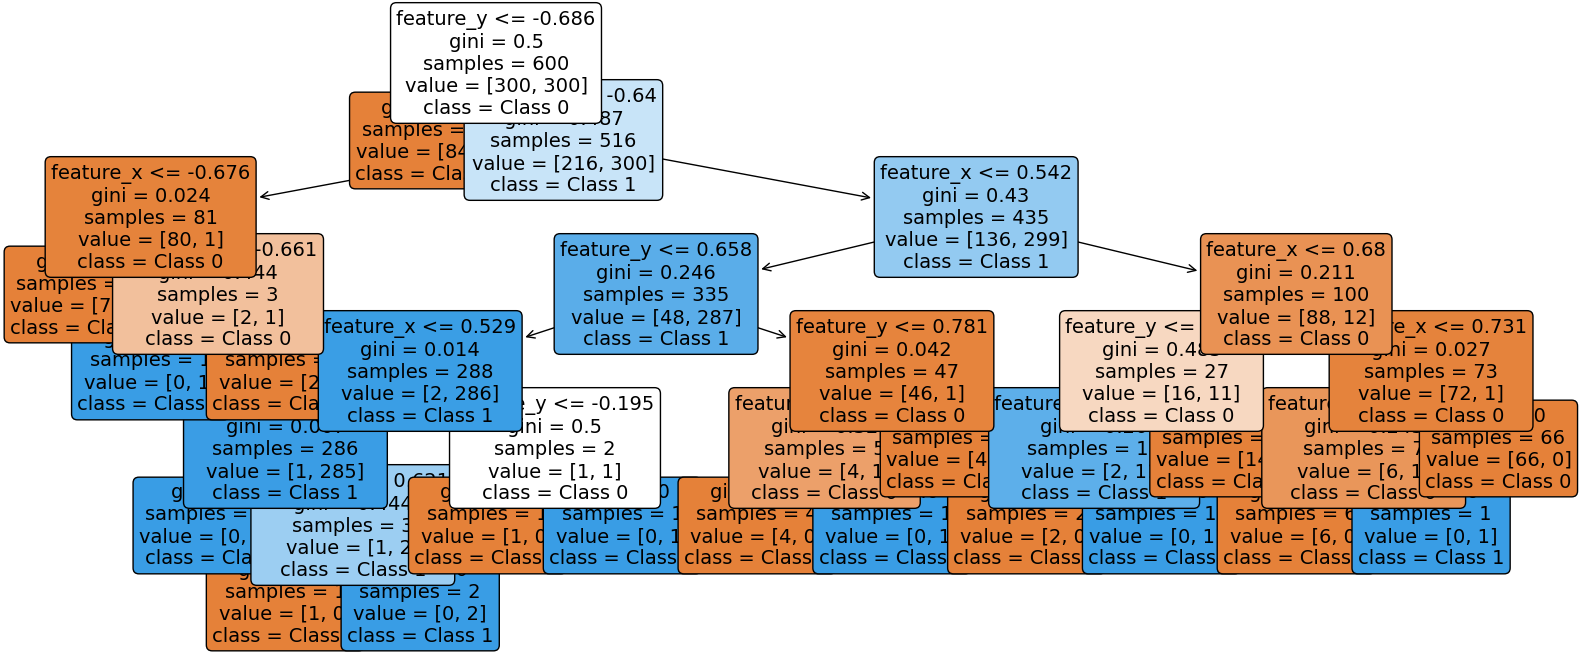

In [5]:
# Extract textual rules
tree_rules = export_text(decision_tree, feature_names=["feature_x", "feature_y"])
print(tree_rules, "\n")

# Visualize the tree structure
plt.figure(figsize=(20, 8))
plot_tree(decision_tree, feature_names=["feature_x", "feature_y"],
          class_names=["Class 0", "Class 1"], rounded=True, filled=True, fontsize=14)
plt.show()

The visual representation above portrays a tree structure derived from graph theory, serving as the foundation for making predictions. To predict using a given feature vector, follow these steps:

1) Initiate at the root node (depth $0$, positioned at the top).
2) If the value of $x_1 \leq 0.268$, proceed to the left child node at depth 1; otherwise, move to the right child node at the same depth.
3) Continue this process, navigating through child nodes based on the boolean conditions at each parent node until you reach a leaf node (a terminal node with no further child nodes).
4) The predicted class associated with this leaf node represents the predicted class for our feature vector, denoted as $x =[x_0, x_1]^T$.

That summarizes the prediction process! To visualize the decision boundaries established by our trained decision tree, execute the code cell below.

---

The mlxtend library provides a convenient function, plot_decision_regions, for visualizing decision boundaries for classification models. However, this function might not directly support non-linear datasets like the make_circles dataset due to its specific characteristics.

To visualize decision boundaries for a make_circles dataset with a decision tree classifier, you can use matplotlib along with meshgrid and contour plotting, similar to what we did earlier. Here's an adaptation to create decision boundaries for your make_circles dataset:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


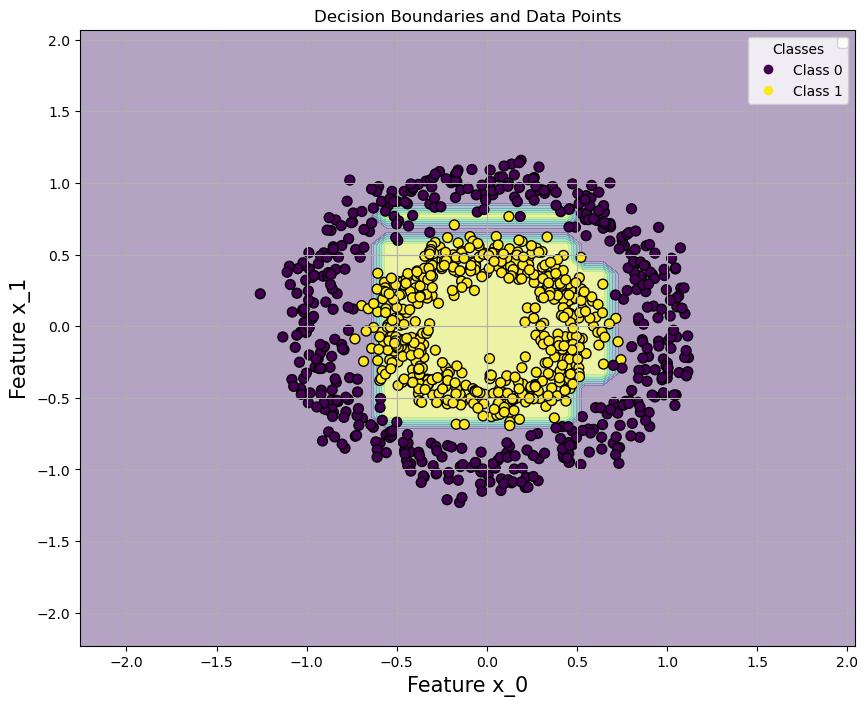

In [6]:
# Meshgrid creation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the meshgrid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')  # Adjust colormap if needed

# Scatter plot for each class with different markers
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='viridis')

# Custom legend with circles and triangles
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel("Feature x_0", fontsize=15)
plt.ylabel("Feature x_1", fontsize=15)
plt.grid()

# Set markers for the legend
legend1.legendHandles[0]._sizes = [100]
legend1.legendHandles[1]._sizes = [100]
legend1.get_texts()[0].set_text('Class 0')
legend1.get_texts()[1].set_text('Class 1')

# Add legend and title
plt.legend(loc='upper right')
plt.gca().add_artist(legend1)
plt.title('Decision Boundaries and Data Points')

plt.show()

Next in our machine learning workflow, we proceed to assess the performance of our model using the testing data. To achieve this evaluation, execute the following two code cells.

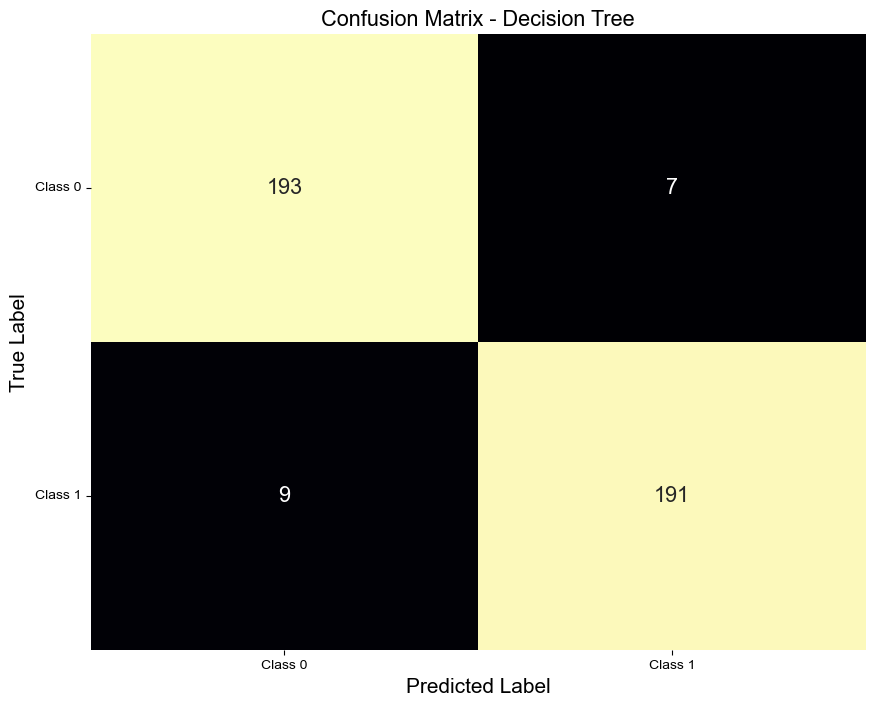

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.96      0.95      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [7]:
# Generating make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fitting a decision tree classifier with less depth to reduce overfitting
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

# Predicted values on the testing data
y_pred = decision_tree.predict(X_test)

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Convert confusion matrix into DataFrame
matrix_df = pd.DataFrame(confusion_mat, columns=['Predicted Class 0', 'Predicted Class 1'], index=['True Class 0', 'True Class 1'])

# Plotting the heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma", cbar=False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_xticklabels(["Class 0", "Class 1"])
ax.set_yticklabels(["Class 0", "Class 1"], rotation=0)
plt.show()

# Display the classification report
print(report)

# Regression Trees

Let's try a Regression Tree example.

Mean Squared Error: 545.1856617326116


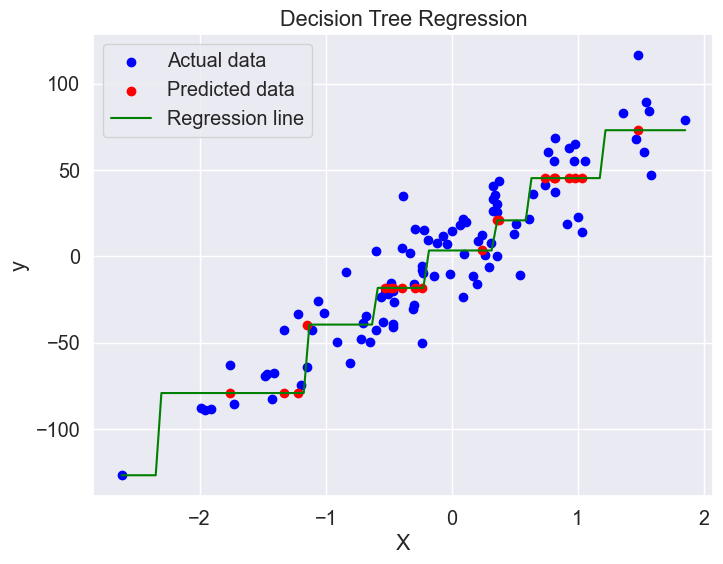

In [8]:
# Generate synthetic dataset for regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor and fit the model
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the regression line
plt.figure(figsize=(8, 6))

# Plotting the actual data
plt.scatter(X, y, c='blue', label='Actual data')

# Plotting the predicted data
plt.scatter(X_test, y_pred, c='red', label='Predicted data')

# Plotting the regression line
x_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
plt.plot(x_range, regressor.predict(x_range), color='green', label='Regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

Yes, the mean squared error (MSE) provided (545.1856617326116) is within the expected range given the noise level in this synthetic dataset (noise=20).

The MSE is a measure of the average squared difference between the actual and predicted values. In regression problems, it is influenced by both the inherent variability in the data (noise) and the ability of the model to capture the underlying patterns.

In this case, a noise level of 20 suggests that there is a considerable amount of variability in the target variable (y). Therefore, even a well-fitted model may have a relatively high MSE due to the influence of this noise. The MSE should be interpreted in the context of the scale of the target variable.

If I want to get a sense of how well this model is performing relative to the noise level, I can calculate the coefficient of determination (R-squared). R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where 1 indicates a perfect fit.

In [9]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7408873665858519


An R-squared value of 0.7408873665858519 is generally considered quite good, especially for a simple model like a decision tree and given the noise level in this synthetic dataset.

R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variable(s). In this case, it means that the decision tree model explains approximately 74.1% of the variability in the target variable (y), which is a relatively high percentage.

Here's a rough guide for interpreting R-squared values:

* 0.0: The model explains none of the variability in the response variable around its mean.
* 1.0: The model explains all the variability in the response variable around its mean.

An R-squared value of 0.74 indicates a strong correlation between the predictor variable (X) and the target variable (y), considering the inherent noise in the data. It suggests that the decision tree model is capturing a substantial portion of the underlying patterns.

# Conclusion

Decision trees and regression trees are powerful and interpretable machine learning models used extensively in both classification and regression tasks. Decision trees construct a tree-like model by recursively partitioning the feature space based on the most informative features at each node. On the other hand, regression trees are specifically designed for regression tasks, predicting continuous numerical values by partitioning the feature space and assigning output values to each leaf node. Both tree-based models offer interpretability, ease of visualization, and the ability to handle non-linear relationships between features and target variables. However, these models can be prone to overfitting, especially when not properly regularized using techniques such as pruning (for decision trees) or controlling tree depth (for regression trees). Proper parameter tuning and validation techniques are crucial for achieving robust and accurate models while mitigating overfitting risks.